In [3]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.decomposition import PCA
import joblib
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [4]:
df=pd.read_csv(r"C:\Users\gargm\OneDrive\Desktop\creditcard_200fraud_2000total.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,58208.0,-2.019166,-0.578874,1.504505,1.354587,0.226401,0.726988,-0.594139,1.050580,-0.116071,...,0.321331,0.634652,0.071080,-0.265489,0.010691,-0.173236,0.305765,-0.069046,111.39,0
1,131817.0,2.034841,-0.268638,-1.169341,0.105110,-0.030076,-0.533218,-0.057155,-0.154117,0.831379,...,0.113967,0.662357,-0.020104,-0.259289,0.231869,0.193427,-0.026246,-0.075328,1.00,0
2,121137.0,0.447043,-3.752657,-4.929845,-1.207053,1.719005,2.920397,1.117114,0.145799,-1.328166,...,1.052068,0.848481,-1.028140,0.854999,0.454064,0.219412,-0.255585,0.066048,962.60,0
3,79486.0,1.060829,0.078832,0.202007,1.326091,-0.248608,-0.592588,0.295920,-0.117732,0.142922,...,0.047031,0.179703,-0.128323,0.422737,0.694560,-0.272694,0.013594,0.023336,63.96,0
4,82323.0,1.060204,-0.217042,0.332276,0.031227,-0.475961,-0.451474,-0.036400,0.020121,-0.130257,...,-0.097197,-0.449928,0.094837,0.274796,0.014843,0.807504,-0.086196,0.005343,71.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,153317.0,2.058804,-1.259624,-0.817921,-0.996264,-0.919433,-0.288045,-0.946464,-0.062914,0.194778,...,0.024365,-0.163854,0.165099,-1.036200,-0.418875,-0.382562,-0.006610,-0.034502,100.00,0
1996,32531.0,-0.841588,0.248806,0.478052,-1.781079,0.253525,0.361532,-0.022467,0.706817,-1.706292,...,0.555480,1.432780,-0.007128,-0.601803,-0.344348,-0.161764,0.042216,0.043470,22.00,0
1997,46332.0,0.803343,-0.277287,0.075839,1.427518,-0.299565,-0.530020,0.539634,-0.209054,-0.018729,...,0.139201,0.189511,-0.258111,0.443283,0.677689,-0.289598,-0.005232,0.048534,197.47,0
1998,160423.0,-0.373500,0.784563,-0.609841,-0.435251,0.715591,0.407031,0.761898,0.473467,-0.418890,...,0.594641,1.746301,0.170116,-0.986475,-1.010953,-0.141323,0.172465,0.193364,77.08,0


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,58208.0,-2.019166,-0.578874,1.504505,1.354587,0.226401,0.726988,-0.594139,1.050580,-0.116071,...,0.321331,0.634652,0.071080,-0.265489,0.010691,-0.173236,0.305765,-0.069046,111.39,0
1,131817.0,2.034841,-0.268638,-1.169341,0.105110,-0.030076,-0.533218,-0.057155,-0.154117,0.831379,...,0.113967,0.662357,-0.020104,-0.259289,0.231869,0.193427,-0.026246,-0.075328,1.00,0
2,121137.0,0.447043,-3.752657,-4.929845,-1.207053,1.719005,2.920397,1.117114,0.145799,-1.328166,...,1.052068,0.848481,-1.028140,0.854999,0.454064,0.219412,-0.255585,0.066048,962.60,0
3,79486.0,1.060829,0.078832,0.202007,1.326091,-0.248608,-0.592588,0.295920,-0.117732,0.142922,...,0.047031,0.179703,-0.128323,0.422737,0.694560,-0.272694,0.013594,0.023336,63.96,0
4,82323.0,1.060204,-0.217042,0.332276,0.031227,-0.475961,-0.451474,-0.036400,0.020121,-0.130257,...,-0.097197,-0.449928,0.094837,0.274796,0.014843,0.807504,-0.086196,0.005343,71.96,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1995,153317.0,2.058804,-1.259624,-0.817921,-0.996264,-0.919433,-0.288045,-0.946464,-0.062914,0.194778,...,0.024365,-0.163854,0.165099,-1.036200,-0.418875,-0.382562,-0.006610,-0.034502,100.00,0
1996,32531.0,-0.841588,0.248806,0.478052,-1.781079,0.253525,0.361532,-0.022467,0.706817,-1.706292,...,0.555480,1.432780,-0.007128,-0.601803,-0.344348,-0.161764,0.042216,0.043470,22.00,0
1997,46332.0,0.803343,-0.277287,0.075839,1.427518,-0.299565,-0.530020,0.539634,-0.209054,-0.018729,...,0.139201,0.189511,-0.258111,0.443283,0.677689,-0.289598,-0.005232,0.048534,197.47,0
1998,160423.0,-0.373500,0.784563,-0.609841,-0.435251,0.715591,0.407031,0.761898,0.473467,-0.418890,...,0.594641,1.746301,0.170116,-0.986475,-1.010953,-0.141323,0.172465,0.193364,77.08,0
1999,121971.0,-1.050171,1.578408,-2.617780,-1.544390,2.384556,3.253186,-0.629456,0.999000,-0.237848,...,0.479228,-1.213388,0.330837,0.574773,-0.308244,0.180025,0.146958,0.001958,8.98,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2000 non-null   float64
 1   V1      2000 non-null   float64
 2   V2      2000 non-null   float64
 3   V3      2000 non-null   float64
 4   V4      2000 non-null   float64
 5   V5      2000 non-null   float64
 6   V6      2000 non-null   float64
 7   V7      2000 non-null   float64
 8   V8      2000 non-null   float64
 9   V9      2000 non-null   float64
 10  V10     2000 non-null   float64
 11  V11     2000 non-null   float64
 12  V12     2000 non-null   float64
 13  V13     2000 non-null   float64
 14  V14     2000 non-null   float64
 15  V15     2000 non-null   float64
 16  V16     2000 non-null   float64
 17  V17     2000 non-null   float64
 18  V18     2000 non-null   float64
 19  V19     2000 non-null   float64
 20  V20     2000 non-null   float64
 21  V21     2000 non-null   float64
 22  

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,93384.612500,-0.541529,0.350027,-0.769281,0.454486,-0.267808,-0.181686,-0.591665,0.076562,-0.250592,...,0.099229,-0.014931,-0.012127,-0.006470,0.003167,0.003133,0.019565,0.022350,87.989590,0.100000
std,48299.454478,3.425602,2.536920,3.573328,2.104028,2.509491,1.514032,3.142941,2.648924,1.533142,...,1.575235,0.858584,0.634404,0.601956,0.560062,0.484376,0.612678,0.455612,208.219884,0.300075
min,56.000000,-29.876366,-29.336007,-30.558697,-4.519509,-21.665654,-17.282140,-43.557242,-41.044261,-13.320155,...,-22.797604,-8.887017,-9.002474,-2.836627,-2.561728,-1.237618,-7.263482,-2.085364,0.000000,0.000000
25%,51443.000000,-1.122645,-0.538786,-1.221323,-0.761814,-0.786671,-0.867650,-0.707528,-0.222142,-0.836252,...,-0.226195,-0.550008,-0.179464,-0.357588,-0.336207,-0.331828,-0.068215,-0.050741,4.490000,0.000000
50%,84204.000000,-0.161431,0.148858,-0.018332,0.140940,-0.033078,-0.340743,-0.014850,0.047838,-0.121962,...,0.000704,-0.003554,-0.018879,0.030097,0.037757,-0.040475,0.009498,0.015513,20.000000,0.000000
75%,138899.000000,1.257883,0.976437,0.882101,1.092623,0.637826,0.311438,0.547155,0.402293,0.535414,...,0.249574,0.517747,0.143024,0.423363,0.349104,0.253677,0.130034,0.097262,80.240000,0.000000
max,172619.000000,2.370007,22.057729,3.770236,11.845013,28.516513,6.474115,7.705953,19.587773,6.474148,...,27.202839,8.316275,8.073049,2.971582,2.156042,2.859167,4.359143,15.373170,2775.170000,1.000000


In [9]:
df.shape

(2000, 31)

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.duplicated().sum()

9

In [12]:
duplicates=df[df.duplicated()]
print('Duplicated Rows:')
print(duplicates)
duplicates

Duplicated Rows:
          Time         V1         V2         V3        V4         V5  \
296    68207.0 -13.192671  12.785971  -9.906650  3.320337  -4.801176   
709    68207.0 -13.192671  12.785971  -9.906650  3.320337  -4.801176   
836    84204.0  -0.937843   3.462889  -6.445104  4.932199  -2.233983   
1127  148053.0   1.261324   2.726800  -5.435019  5.342759   1.447043   
1169   94362.0 -26.457745  16.497472 -30.177317  8.904157 -17.892600   
1170   93860.0 -10.632375   7.251936 -17.681072  8.204144 -10.166591   
1359   68207.0 -13.192671  12.785971  -9.906650  3.320337  -4.801176   
1400   85285.0  -6.713407   3.921104  -9.746678  5.148263  -5.151563   
1560   94362.0 -26.457745  16.497472 -30.177317  8.904157 -17.892600   

            V6         V7         V8        V9  ...        V21       V22  \
296   5.760059 -18.750889 -37.353443 -0.391540  ...  27.202839 -8.887017   
709   5.760059 -18.750889 -37.353443 -0.391540  ...  27.202839 -8.887017   
836  -2.291561  -5.695594   1.3388

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
296,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
709,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
836,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
1127,148053.0,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1.59,1
1169,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
1170,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
1359,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
1400,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
1560,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(1991, 31)

In [16]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
df['Hours']=(df['Time']//3600)%24
df['Hours']

0       16.0
1       12.0
2        9.0
3       22.0
4       22.0
        ... 
1995    18.0
1996     9.0
1997    12.0
1998    20.0
1999     9.0
Name: Hours, Length: 1991, dtype: float64

In [18]:
df.drop('Time',axis=1,inplace=True)

In [19]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Hours'],
      dtype='object')

In [20]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hours
0,-2.019166,-0.578874,1.504505,1.354587,0.226401,0.726988,-0.594139,1.050580,-0.116071,-0.521601,...,0.634652,0.071080,-0.265489,0.010691,-0.173236,0.305765,-0.069046,111.39,0,16.0
1,2.034841,-0.268638,-1.169341,0.105110,-0.030076,-0.533218,-0.057155,-0.154117,0.831379,-0.041955,...,0.662357,-0.020104,-0.259289,0.231869,0.193427,-0.026246,-0.075328,1.00,0,12.0
2,0.447043,-3.752657,-4.929845,-1.207053,1.719005,2.920397,1.117114,0.145799,-1.328166,0.515484,...,0.848481,-1.028140,0.854999,0.454064,0.219412,-0.255585,0.066048,962.60,0,9.0
3,1.060829,0.078832,0.202007,1.326091,-0.248608,-0.592588,0.295920,-0.117732,0.142922,-0.122075,...,0.179703,-0.128323,0.422737,0.694560,-0.272694,0.013594,0.023336,63.96,0,22.0
4,1.060204,-0.217042,0.332276,0.031227,-0.475961,-0.451474,-0.036400,0.020121,-0.130257,-0.041466,...,-0.449928,0.094837,0.274796,0.014843,0.807504,-0.086196,0.005343,71.96,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.058804,-1.259624,-0.817921,-0.996264,-0.919433,-0.288045,-0.946464,-0.062914,0.194778,0.719885,...,-0.163854,0.165099,-1.036200,-0.418875,-0.382562,-0.006610,-0.034502,100.00,0,18.0
1996,-0.841588,0.248806,0.478052,-1.781079,0.253525,0.361532,-0.022467,0.706817,-1.706292,-0.349059,...,1.432780,-0.007128,-0.601803,-0.344348,-0.161764,0.042216,0.043470,22.00,0,9.0
1997,0.803343,-0.277287,0.075839,1.427518,-0.299565,-0.530020,0.539634,-0.209054,-0.018729,-0.212458,...,0.189511,-0.258111,0.443283,0.677689,-0.289598,-0.005232,0.048534,197.47,0,12.0
1998,-0.373500,0.784563,-0.609841,-0.435251,0.715591,0.407031,0.761898,0.473467,-0.418890,-0.926139,...,1.746301,0.170116,-0.986475,-1.010953,-0.141323,0.172465,0.193364,77.08,0,20.0


In [21]:
average_amount=df['Amount'].mean()
df['AvgRatio_of_Amount']=df['Amount']/average_amount
df[['Amount','AvgRatio_of_Amount']].head()

,Amount,AvgRatio_of_Amount
0,111.39,1.263465
1,1.00,0.011343
2,962.60,10.918499
3,63.96,0.725480
4,71.96,0.816222


In [22]:
df.drop('Amount',axis=1,inplace=True)

In [23]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Hours,AvgRatio_of_Amount
0,-2.019166,-0.578874,1.504505,1.354587,0.226401,0.726988,-0.594139,1.050580,-0.116071,-0.521601,...,0.634652,0.071080,-0.265489,0.010691,-0.173236,0.305765,-0.069046,0,16.0,1.263465
1,2.034841,-0.268638,-1.169341,0.105110,-0.030076,-0.533218,-0.057155,-0.154117,0.831379,-0.041955,...,0.662357,-0.020104,-0.259289,0.231869,0.193427,-0.026246,-0.075328,0,12.0,0.011343
2,0.447043,-3.752657,-4.929845,-1.207053,1.719005,2.920397,1.117114,0.145799,-1.328166,0.515484,...,0.848481,-1.028140,0.854999,0.454064,0.219412,-0.255585,0.066048,0,9.0,10.918499
3,1.060829,0.078832,0.202007,1.326091,-0.248608,-0.592588,0.295920,-0.117732,0.142922,-0.122075,...,0.179703,-0.128323,0.422737,0.694560,-0.272694,0.013594,0.023336,0,22.0,0.725480
4,1.060204,-0.217042,0.332276,0.031227,-0.475961,-0.451474,-0.036400,0.020121,-0.130257,-0.041466,...,-0.449928,0.094837,0.274796,0.014843,0.807504,-0.086196,0.005343,0,22.0,0.816222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.058804,-1.259624,-0.817921,-0.996264,-0.919433,-0.288045,-0.946464,-0.062914,0.194778,0.719885,...,-0.163854,0.165099,-1.036200,-0.418875,-0.382562,-0.006610,-0.034502,0,18.0,1.134272
1996,-0.841588,0.248806,0.478052,-1.781079,0.253525,0.361532,-0.022467,0.706817,-1.706292,-0.349059,...,1.432780,-0.007128,-0.601803,-0.344348,-0.161764,0.042216,0.043470,0,9.0,0.249540
1997,0.803343,-0.277287,0.075839,1.427518,-0.299565,-0.530020,0.539634,-0.209054,-0.018729,-0.212458,...,0.189511,-0.258111,0.443283,0.677689,-0.289598,-0.005232,0.048534,0,12.0,2.239846
1998,-0.373500,0.784563,-0.609841,-0.435251,0.715591,0.407031,0.761898,0.473467,-0.418890,-0.926139,...,1.746301,0.170116,-0.986475,-1.010953,-0.141323,0.172465,0.193364,0,20.0,0.874297


In [24]:
v_columns=[f'V{i}'for i in range(1,29)]

In [25]:
# z-score for outlier
z_score=df[v_columns].apply(zscore)
outliers=(z_score.abs()>3).sum()
outliers

V1     38
V2     42
V3     36
V4     42
V5     40
V6     40
V7     42
V8     30
V9     33
V10    52
V11    44
V12    56
V13    13
V14    66
V15     7
V16    55
V17    61
V18    51
V19    32
V20    33
V21    20
V22     8
V23    31
V24     5
V25    30
V26     8
V27    40
V28    18
dtype: int64

In [26]:
#IQR Method
outlier_count={}
for col in v_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q1+1.5*IQR
    outlier=df[(df[col]<lower)|(df[col]>upper)]
    outlier_count[col]=outlier.shape[0]
outlier_count

{'V1': 104,
 'V2': 295,
 'V3': 243,
 'V4': 284,
 'V5': 311,
 'V6': 356,
 'V7': 265,
 'V8': 362,
 'V9': 293,
 'V10': 416,
 'V11': 193,
 'V12': 324,
 'V13': 199,
 'V14': 375,
 'V15': 141,
 'V16': 309,
 'V17': 369,
 'V18': 290,
 'V19': 250,
 'V20': 365,
 'V21': 279,
 'V22': 140,
 'V23': 360,
 'V24': 134,
 'V25': 191,
 'V26': 275,
 'V27': 510,
 'V28': 434}

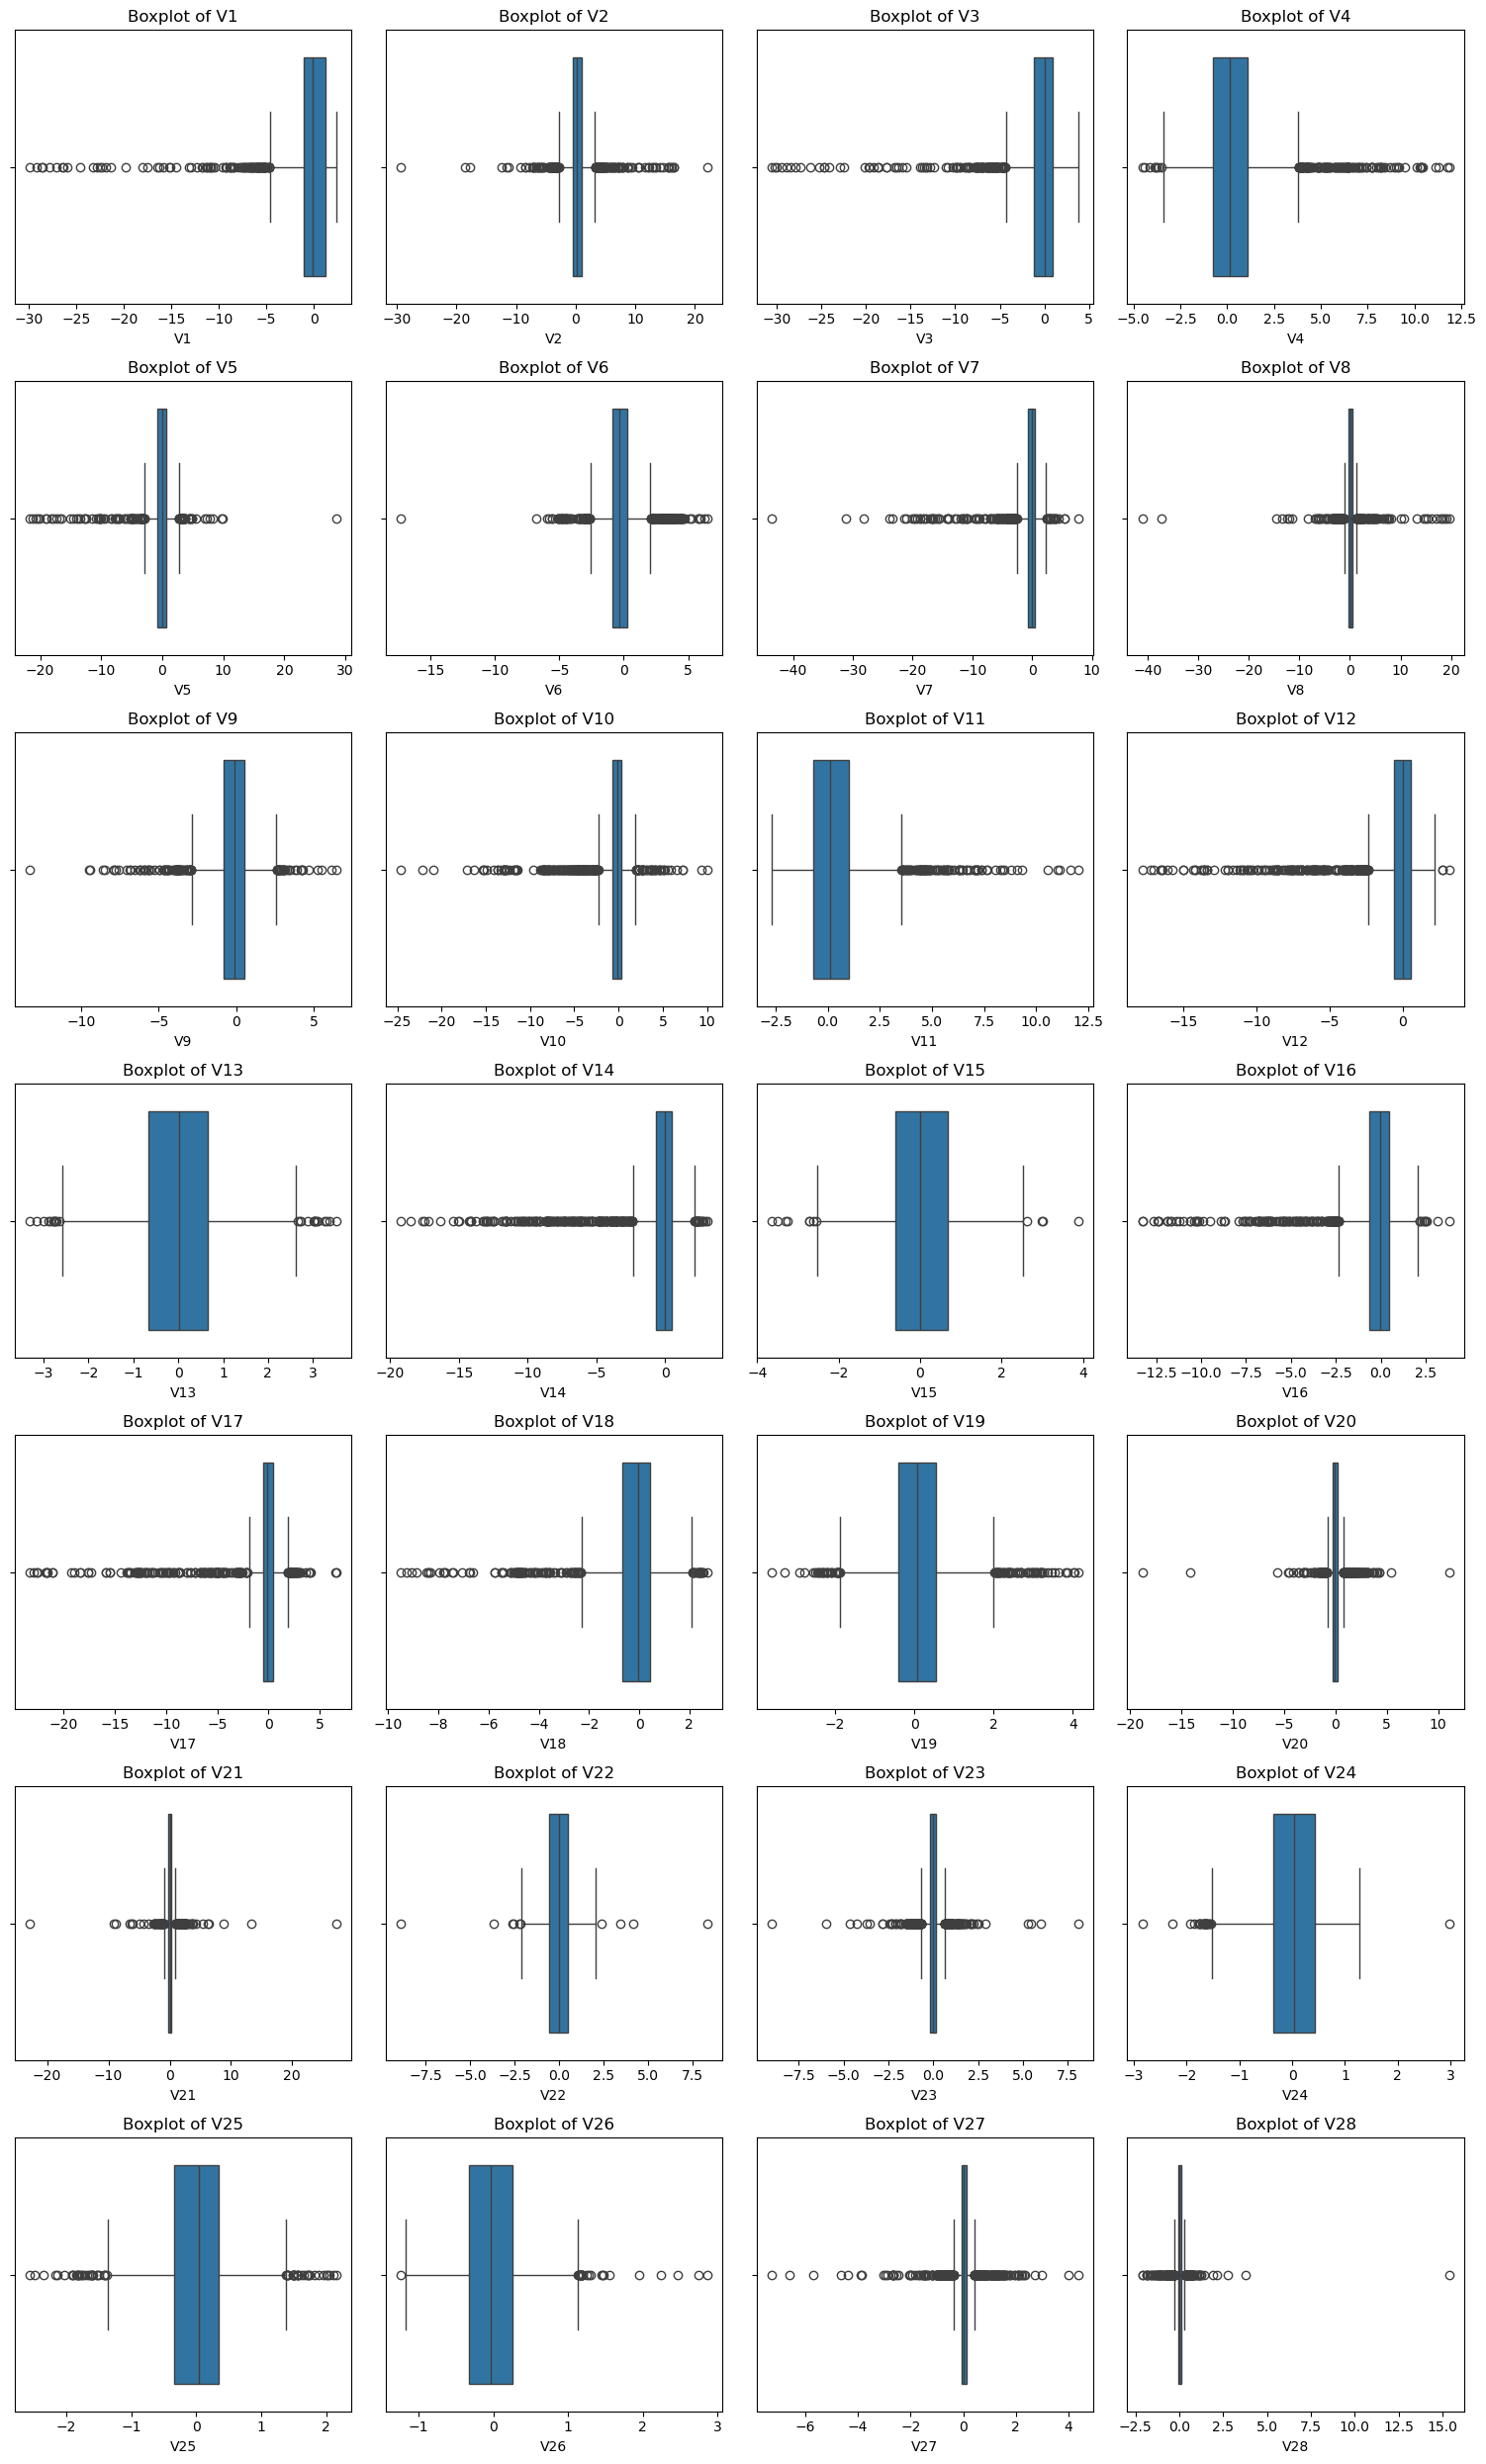

In [27]:
#Box Plot 
plt.figure(figsize=(15,25))
for i,col in enumerate(v_columns):
    plt.subplot(7,4,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [28]:
#correlation matrix
correlation_matrix=df[v_columns].corr()

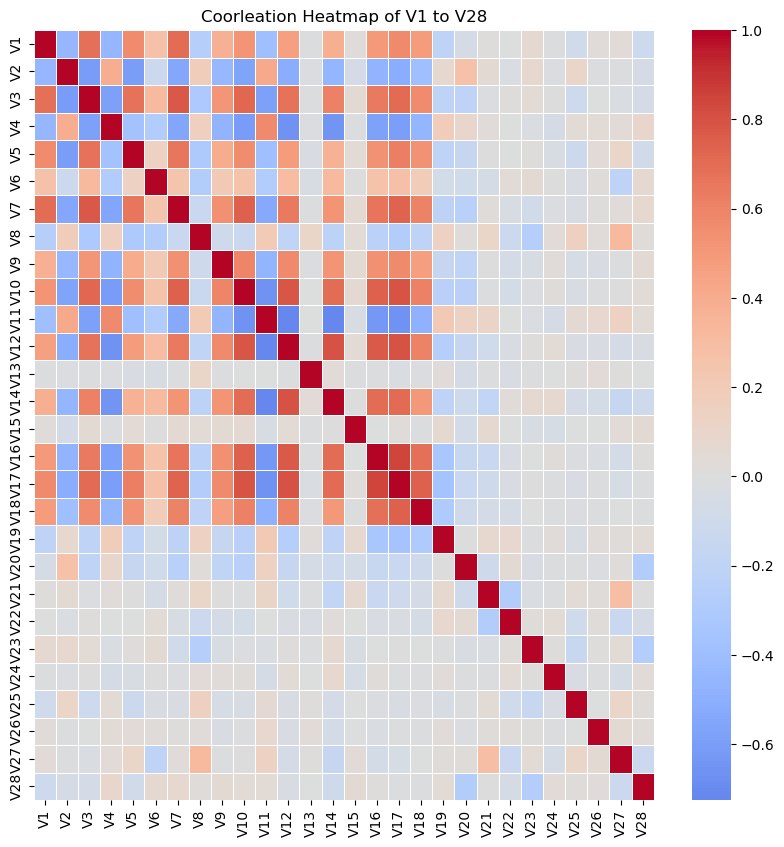

In [29]:
#visualize
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=False,center=0,linewidth=0.5)
plt.title('Coorleation Heatmap of V1 to V28')
plt.show()

In [30]:
#Highly Correlated Pairs|corr>0.9|
upper=correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)
redundant_pairs = [(col, row) for col in upper.columns for row in upper.index 
                   if abs(upper.loc[row, col]) > 0.9]
print("Highly correlated feature pairs (|corr| > 0.9):")
for pair in redundant_pairs:
    print(pair, f"Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f}")

Highly correlated feature pairs (|corr| > 0.9):


In [31]:
# split the data 
x=df.drop('Class',axis=1)
y=df['Class']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier( eval_metric='logloss', random_state=42))
])

In [33]:
pipeline.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [34]:
# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate pipeline
scores = cross_val_score(pipeline, x, y, cv=cv, scoring='f1', n_jobs=-1)

print("F1 Scores (5-fold CV):", scores)
print("Average F1 Score:", scores.mean())

F1 Scores (5-fold CV): [0.93506494 0.90140845 0.93333333 0.82666667 0.94594595]
Average F1 Score: 0.9084838663430214


In [35]:
joblib.dump(pipeline, "fraud_detection_model.joblib")

['fraud_detection_model.joblib']

In [36]:
y_pred = pipeline.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, pipeline.predict_proba(x_test)[:, 1]))

[[361   0]
 [  0  38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      1.00      1.00        38

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399

ROC AUC Score: 1.0


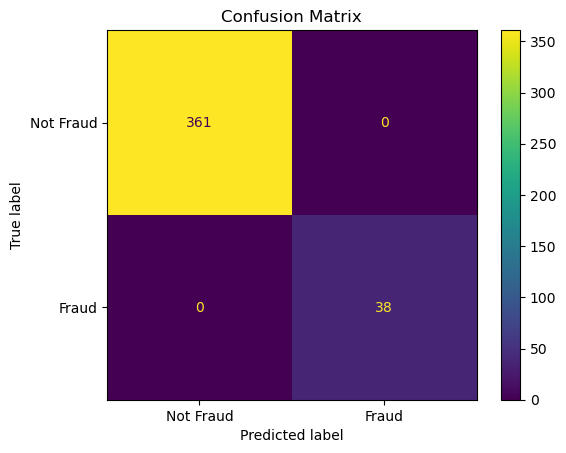

In [37]:
y_pred = pipeline.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.show()

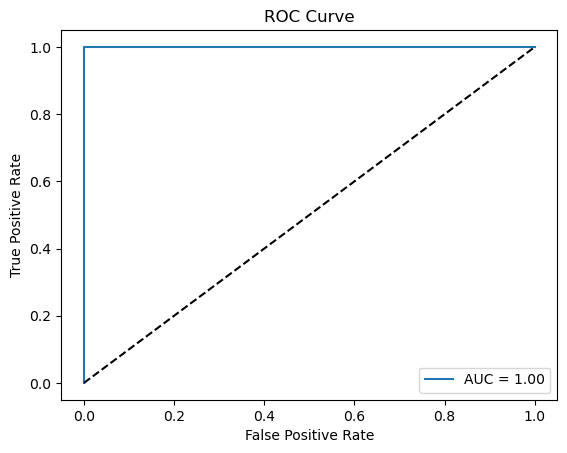

In [38]:
y_scores = pipeline.predict_proba(x_test)[:, 1]  # Probabilities for fraud
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

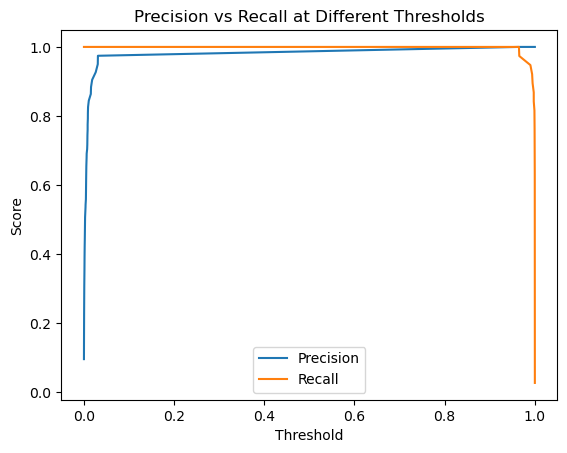

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall at Different Thresholds")
plt.legend()
plt.show()

<Axes: >

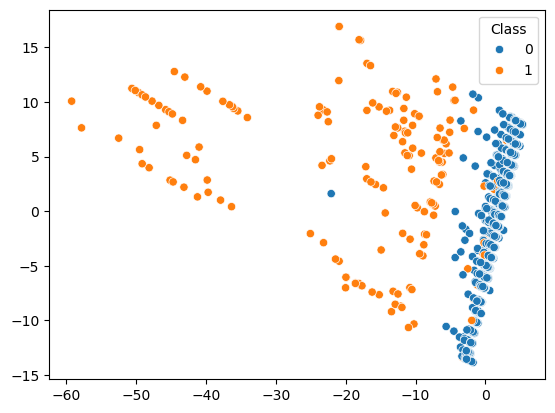

In [40]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
# Plot fraud vs non-fraud in 2D
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=df['Class'])